In [1]:
from Learners import GreedyLearner, GreedyUCBLearner
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(5)

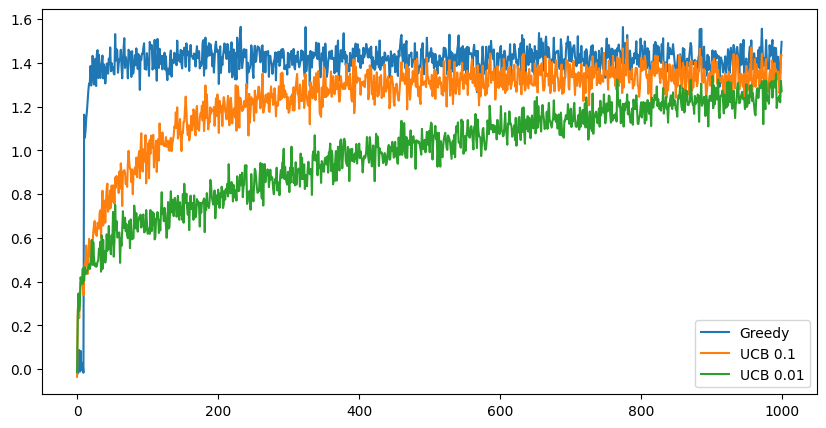

In [4]:

num_arms = 10
rounds = 1000
num_tests = 500

learners = [(GreedyLearner, {'rounds': rounds, 'num_arms': num_arms, 'initial_value': 5,
                                'epsilon': 0.0}),
            (GreedyUCBLearner, {'rounds': rounds, 'num_arms': num_arms, 'initial_value': 0,
                                'c': 2, 'epsilon': 0.1}),
            (GreedyUCBLearner, {'rounds': rounds, 'num_arms': num_arms, 'initial_value': 0,
                                'c': 2, 'epsilon': 0.01})
            ]

scores = [np.empty((num_tests, rounds)) for _ in range(len(learners))]


for i in range(num_tests):

    means = np.random.normal(size=num_arms)
    testbed = np.random.normal(loc=means, size=(rounds, num_arms))

    for idx, (learner_class, kwargs) in enumerate(learners):

        learner = learner_class(testbed=testbed, **kwargs)
        learner.learn()
        scores[idx][i] = learner.rewards



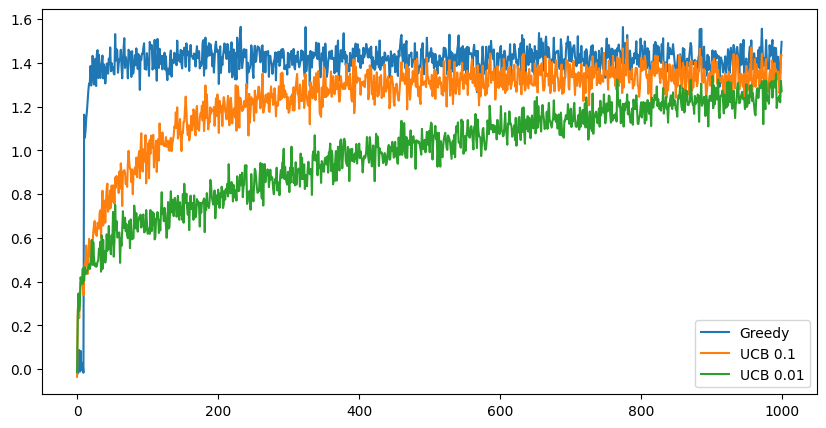

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(np.mean(scores[0], axis=0), label='Greedy')
ax.plot(np.mean(scores[1], axis=0), label='UCB 0.1')
ax.plot(np.mean(scores[2], axis=0), label='UCB 0.01')
plt.legend()
plt.show()
